Thanks to https://seaborn.pydata.org/tutorial.html

# Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.



In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))  # seed for numpy's random number generator, not seaborn related

## Matplotlib vs Seaborn

When using-matplotlib, there are two different approaches:
 * functional interface
 * object-oriented interface

As beginners we usually use the functional interface but as one gains familiarity with mpl the object oriented interface comes into play basically to get more custimizations

```
# Example
x = smthg
y = smthg

# plt interface
plt.figure(figsize=(9,7)
plt.plot(x,y)

# object-oriented interface
fig, ax = plt.subplots()  
ax.plot(x, y)
```

When using seaborn, there are also two approaches. 
 * axes-level functions:  They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function
 * figure-level functions: figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions.
 
 
![figure-level functions](../images/function_overview_8_0.png)


In [3]:
import seaborn as sns


In [4]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Axes level functions example

Axes level functions act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into.

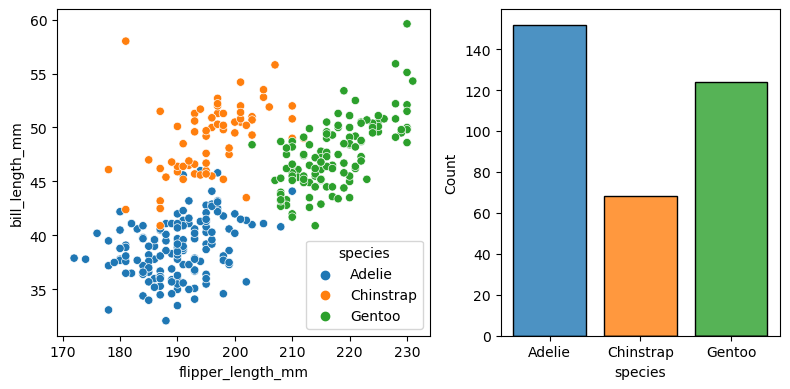

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

### Figure-level functions example

 Figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure

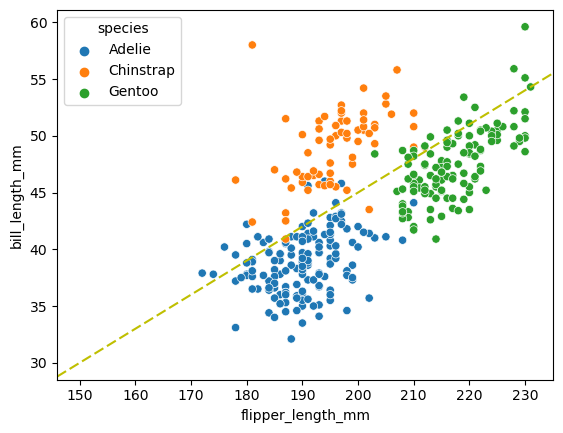

In [7]:
g = sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
g.axline(xy1=(150, 30), slope=.3, color="y", dashes=(5, 2))  # <<-- accessing to the axes object directly

## Conditional small multiples

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue.

In [ ]:
tips

**what happens when you use FacetGrid with no "plot"**

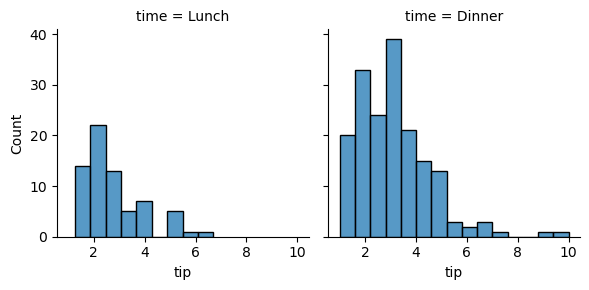

In [8]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

**hue** adds levels of a third variable and plots different subsets of data in different colors.

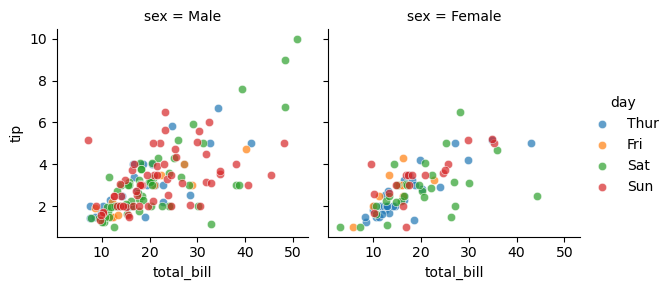

In [9]:
g = sns.FacetGrid(tips, col="sex", hue="day")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

# Tweaking matplotlib

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have **plots that are pleasant to look at**. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.

**Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.**

Let’s define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [10]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

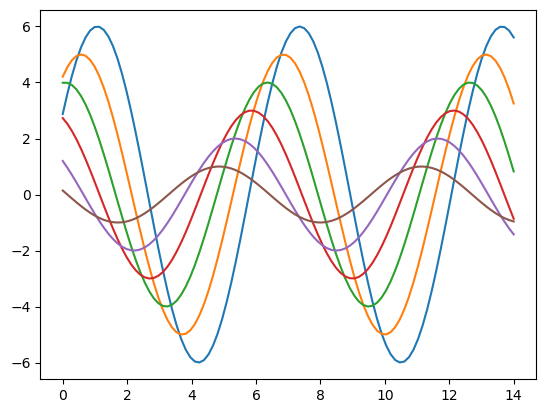

In [11]:
sinplot()

There are lots of preset themes. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements.

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

In [ ]:
plt.style.available

In [ ]:
with plt.style.context('seaborn-darkgrid'):  # CHECK THEM ALL
    sinplot()

In [ ]:
with plt.style.context('seaborn-paper'): # seaborn-paper seaborn-notebook seaborn-talk seaborn-poster
    sinplot()

## Seaborn specific plots

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
    # print(data)
    sns.boxplot(data=data)

## Removing spines with despine()

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

In [ ]:
sinplot()
sns.despine()

When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

In [ ]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    sns.boxplot(data=data, palette="deep")
    sns.despine(left=True)

## Temporarily setting figure style

In [ ]:
with plt.style.context('seaborn-darkgrid'):
    plt.subplot(211)
    sinplot()
with plt.style.context('seaborn-whitegrid'):
    plt.subplot(212)
    sinplot()

## Overriding elements of the seaborn styles with set_style()

In [ ]:
sns.axes_style()

## Scaling plot elements with plotting_context() and set_context()

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling set():

In [ ]:
sns.set()

The four preset contexts, in order of relative size, are **paper, notebook, talk, and poster**. The notebook style is the default, and was used in the plots above.

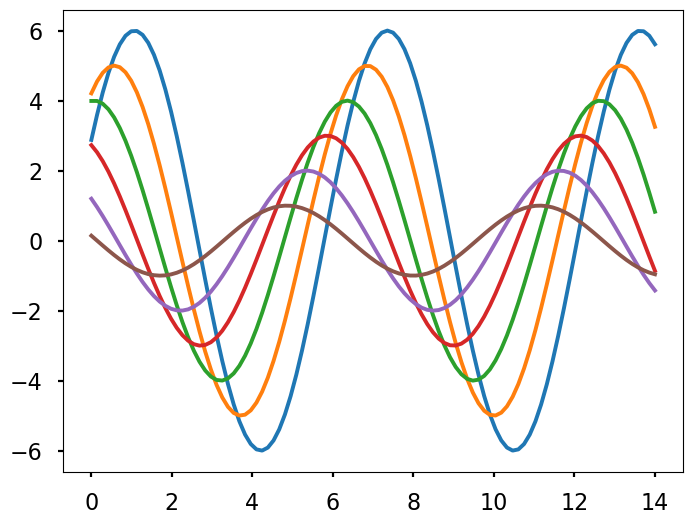

In [12]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8, 6))
    sinplot()

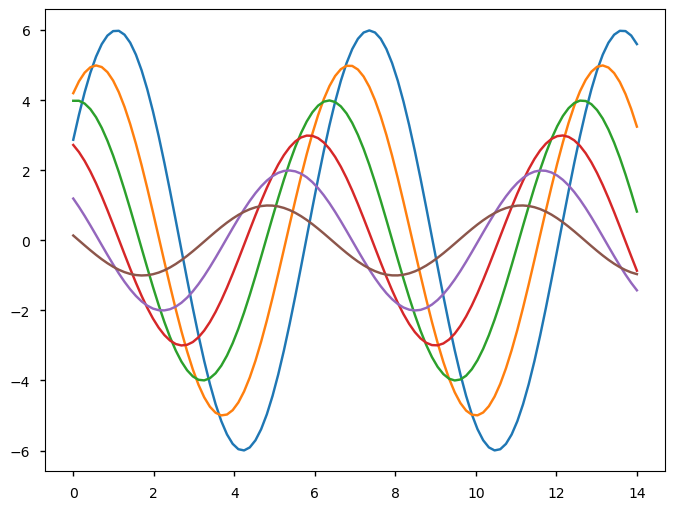

In [13]:
with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(8, 6))
    sinplot()

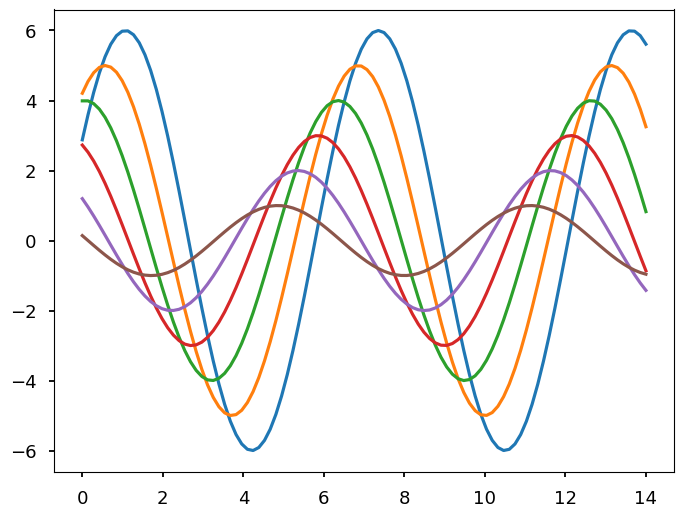

In [14]:
with plt.style.context('seaborn-talk'):
    plt.figure(figsize=(8, 6))
    sinplot()

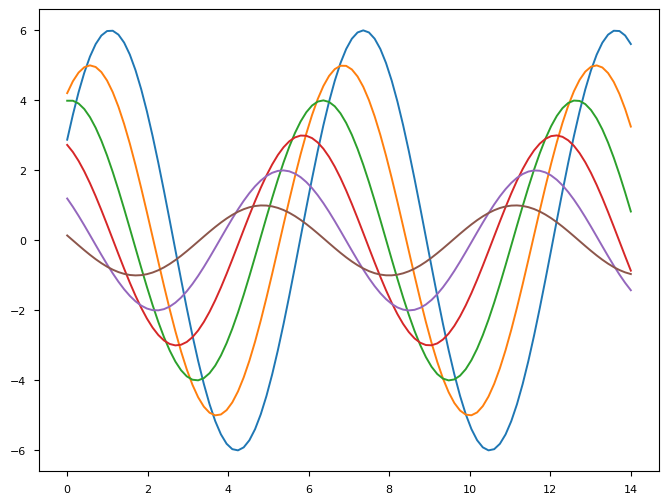

In [15]:
with plt.style.context('seaborn-paper'):
    plt.figure(figsize=(8, 6))
    sinplot()

You can call set_context() with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

In [ ]:
sns.set() # Use defalt

# Color palettes

## Qualitative color palettes

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [ ]:
sns.palplot(sns.color_palette("dark", 10))

And there are other palettes: circular, brewer, sequential, or you can name colors:

In [ ]:
sns.palplot(sns.color_palette("Blues"))

In [ ]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

In [ ]:
sns.palplot(sns.dark_palette("purple"))

In [ ]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True);

In [ ]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x=x, y=y, cmap=pal);

## Changing palettes with set_palette()

In [ ]:
sinplot()

In [ ]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

## Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

In [17]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The distributions module defines functions that specialize in representing the distribution of datapoints. This includes familiar methods like the histogram:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

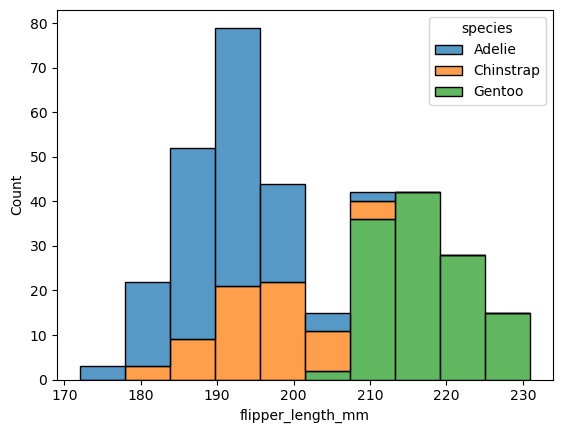

In [16]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Along with similar, but perhaps less familiar, options such as kernel density estimation:

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

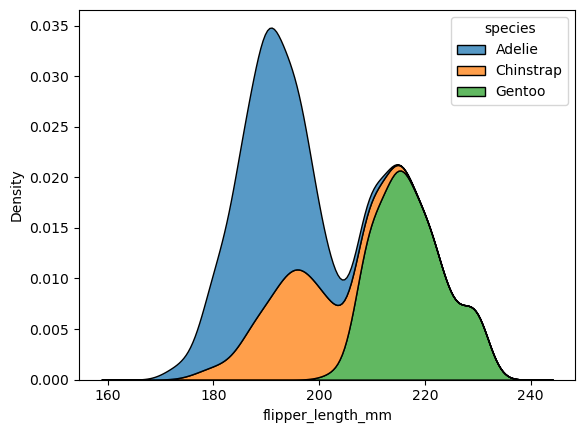

In [18]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

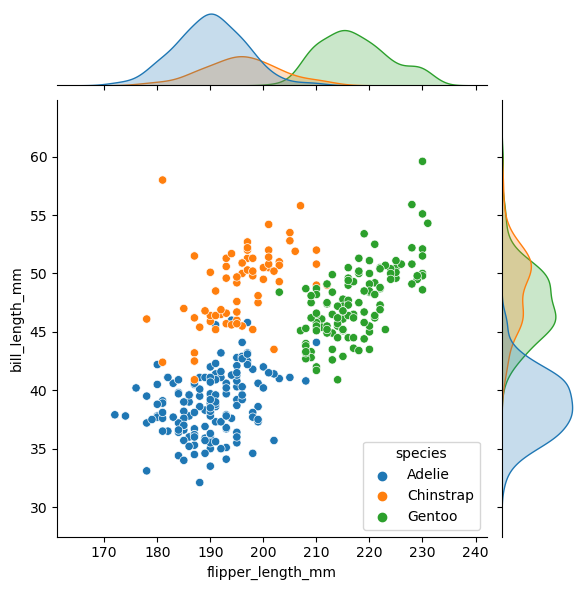

In [19]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:



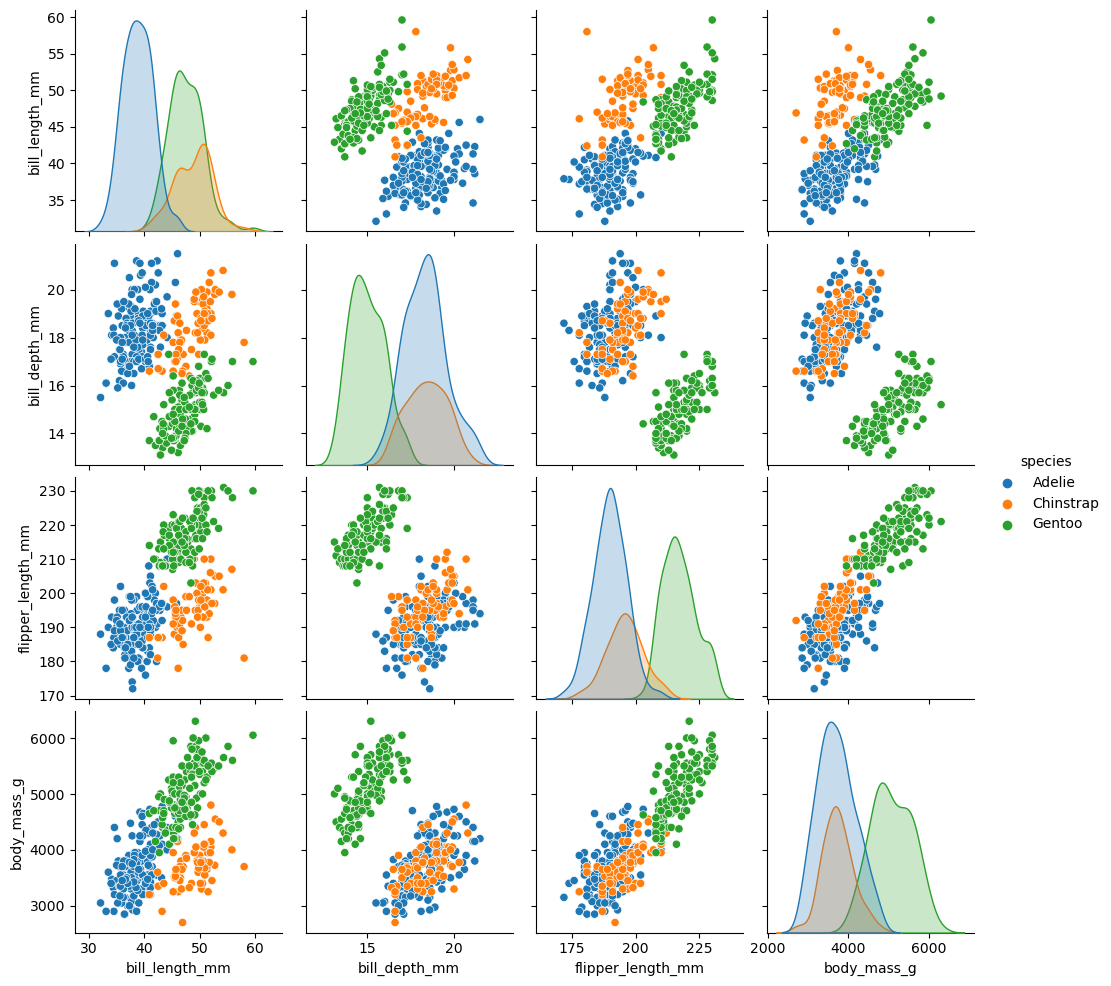

In [20]:
sns.pairplot(data=penguins, hue="species")

## Lower-level tools for building figures
These tools work by combining axes-level plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a grid of axes. Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

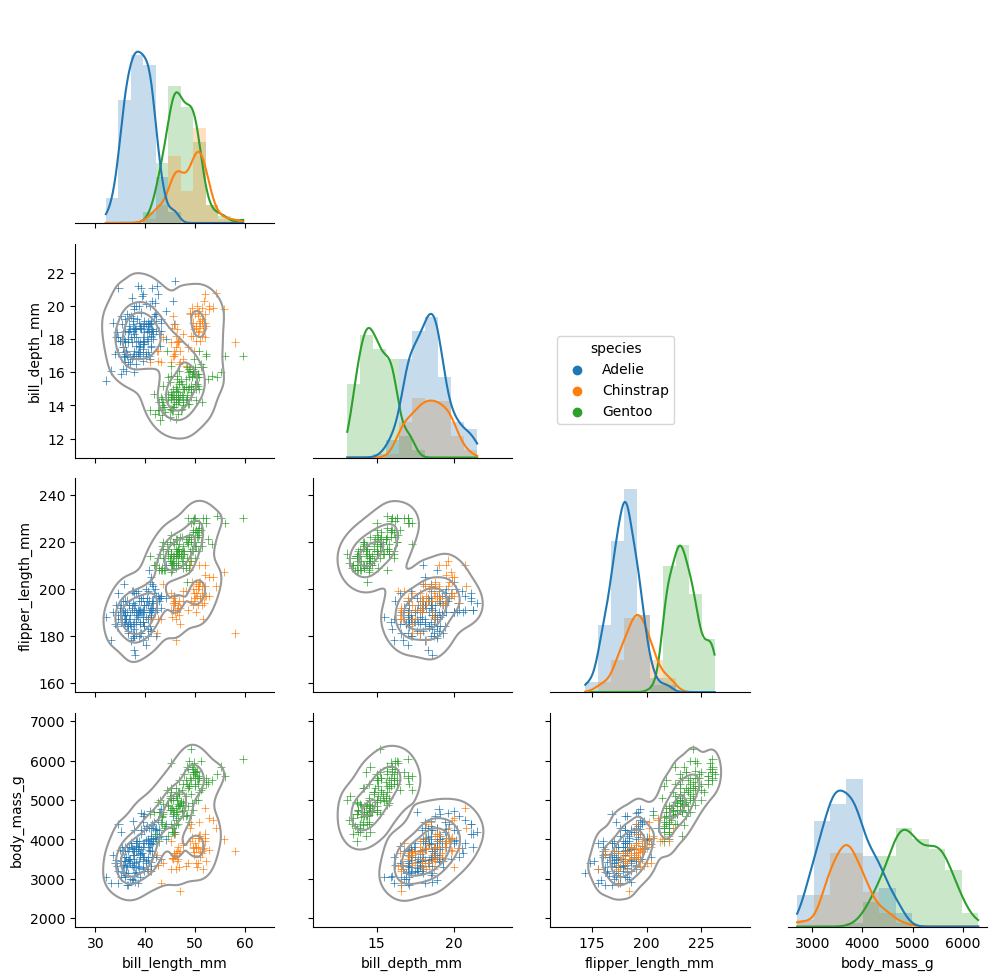

In [24]:
# PairGrid: Subplot grid for plotting pairwise relationships in a dataset
## corner: If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.
g = sns.PairGrid(penguins, hue="species", corner=True)
# map_lower: Plot with a bivariate function on the lower diagonal subplots.
# kdeplot: using kernel density estimation
# levels: Number of contour levels or values to draw
# color: Single color specification for when hue mapping is not used. 
## Try blue or red! what happens if we use a float?
g.map_lower(sns.kdeplot, hue=None, levels=4, color="0.6")
g.map_lower(sns.scatterplot, marker="+")
# map_diag: Plot with a univariate function on each diagonal subplot.
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)  # step, bars, poly
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [ ]:
penguins

## Heatmaps

In [ ]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
# what does pivot in pandas?!????
flights = flights_long.pivot(index="month", columns="year", values="passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Seaborn tutorial: http://seaborn.pydata.org/tutorial